### Phần 1- Giới thiệu
* Bệnh tim là một căn bệnh nguy hiểm và có nguy cơ mắc cao ở người lớn tuổi nhưng hiện nay độ tuổi mắc bệnh đang trẻ hóa. Nên ta cần có một cuộc thí nghiệm để biết được ở những người bệnh tim có các triệu chứng gì để từ đó có thể pháp hiện và điều trị kịp thời
* Mục tiêu nghiên cứu:
Những yếu tố nào cho thấy rõ khả năng mắc bệnh tim?
Độ tuổi có nguy cơ mắc bệnh tim cao?
    * Trạng thái điện tâm đồ của người mắc bệnh tim có gì bất thường?
    * Có sự khác biệt về nguy cơ mắc bệnh tim giữa nam và nữ hay không?
    * Những giải pháp cần được đưa ta để giảm thiểu nguy cơ mắc bệnh tim
    * Tập dữ liệu để phân tích được lấy từ https://www.kaggle.com/ và có từ năm 1988. Nó bao gồm các chỉ số liên quan và ảnh hưởng đến tim.
* Trong quá trình nghiên cứu có thể xảy ra các trường hợp:
Nhóm người có các triệu chứng nhưng lại không mắc bệnh và ngược lại
    * Nhóm người mắc bệnh
    * Nhóm người bình thường
* Các biến trong tập dữ liệu: Tuổi, Giới tính, Các kiểu đau ngực, Huyết áp lúc bình thường, Nồng độ cholestoral, Đường huyết, Điện tâm đồ lúc bình thường, Nhịp tim tối đa, Khả năng đau thắt ngực do tập thể dục, Giá trị chênh lệch của độ dốc đoạn ST, Trạng thái của đoạn ST lúc nghỉ(lên, xuống, thẳng), số lượng mạch chính được quan sát bằng phương pháp soi huỳnh quang, Trạng thái rối loạn máu Thalassemia, Tình trạng bệnh.

### PHẦN 2 - Dữ liệu

In [1]:
import numpy as np
import pandas as pd

Đọc file csv lấy data

In [2]:
df = pd.read_csv("heart_disease_dataset.csv")

Hiển thị 5 dòng đầu của dữ liệu

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Hiển thi 5 dòng cuối của dữ liệu

In [4]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


Thông tin chi tiết của các biến

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Phần 3: Kế hoạch phân tích dữ liệu
* Các biến dự đoán và biến kết quả dùng để trả lời các câu hỏi do nhóm đặt ra
    * Biến dự đoán: age, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target, sex
    * Biến kết quả: target
* Các nhóm so sánh:
    * So sánh các biến giữa người bệnh và người không mắc bệnh
    * So sánh giữa những người khác giới
    * So sánh điện tâm đồ của người bệnh và người không bệnh
    * So sánh các độ tuổi khác nhau
* Các phương pháp thống kê nhóm sẽ dùng:
    * Thu thập và xử lý số liệu
    * Dự đoán
* Kết quả từ các phương pháp thống kê sẽ dùng:
    * Phương pháp dự đoán giúp ta dựa vào bảng số liệu thô và các mối liên hệ trong thực tế giữa các biến để đưa ra những dự đoán phù hợp như: mối quan hệ giữa cholesterol và huyết áp, độ tuổi mắc bệnh tim phổ biến,... từ đó ta sẽ tìm hiểu và chứng minh những dự đoán trên. Trong lúc đó, ta sẽ thấy được những mối quan hệ khác giúp ta hiểu hơn và khai thác tốt hơn tập dữ liệu.
    * Ở phương pháp thu thập và xử lý số liệu ta sẽ tiến tới việc làm rõ và cho thấy được mối quan hệ giữa các biến với nhau đặc biệt là kết quả target và các biến còn lại.
* Phân tích sợ bộ dữ liệu

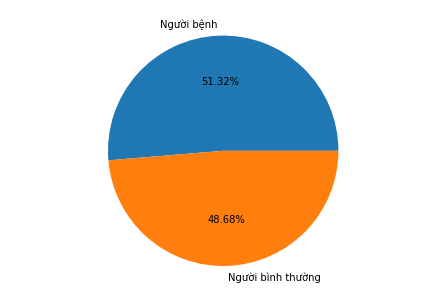

In [7]:
from matplotlib import pyplot as plt
import numpy as np
df['target']
a = np.array(df['target'])
not_nor = np.sum(a == 1) * 100 / len(a)
nor = 100 - not_nor
not_nor
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Người bệnh', 'Người bình thường']
students = [not_nor, nor]
ax.pie(students, labels = langs,autopct = '%1.2f%%')
plt.show()

Biểu đồ cho thấy sự chênh lệch giữa người bệnh và người bình thường không cao từ đó việc phân tích và đánh giá sẽ đạt được độ tin cậy và chính xác cao hơn.

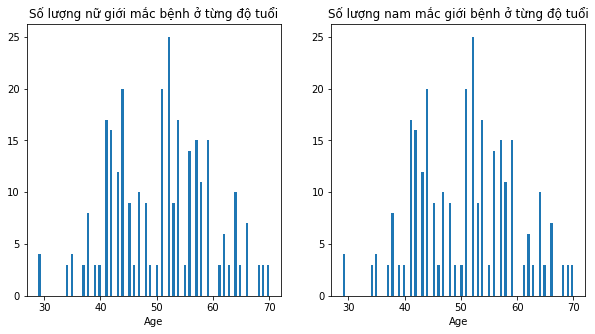

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5));

df1 = df[df["sex"] == 1] 
df1 = df1[['age','target']] 
df2 = df1[df1['target'] == 1]
arr_age_female_Y = df2['age'].to_numpy()
ax1.hist(arr_age_female_Y, bins = 100);
ax1.set(title = "Số lượng nữ giới mắc bệnh ở từng độ tuổi", xlabel = 'Age');

df3 = df[df["sex"] == 0] 
df3 = df3[['age','target']]
df4 = df3[df3['target'] == 1]
arr_age_male_Y = df4['age'].to_numpy() 
ax2.hist(arr_age_female_Y, bins = 100);
ax2.set(title = "Số lượng nam mắc giới bệnh ở từng độ tuổi", xlabel = 'Age');

* Độ tuổi mắc bệnh ở nam và nữ giới có sự tương đồng với nhau.
* Tỷ lệ mắc bệnh cao tập trung nhiều ở độ tuổi 51-53 tuổi.
* Tỷ lệ mắc bệnh trung bình tập trung ở độ tuổi 42-45
* Ở độ tuổi dưới 40 và ngoài 70 tỷ lệ mắc bệnh ít

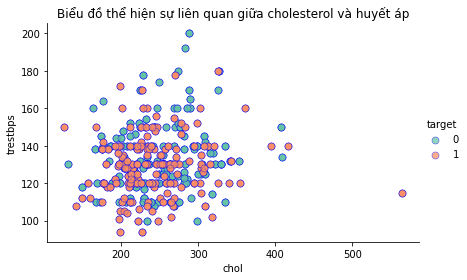

In [9]:
kws = dict(s = 50, linewidth = .5, edgecolor = 'b', alpha = .7) 

tips_fg = sns.FacetGrid(df, hue = "target", height = 4, aspect = 1.5, 
                        palette = 'Set2',  
                        legend_out = True) 
plt.title("Biểu đồ thể hiện sự liên quan giữa cholesterol và huyết áp")
tips_fg.map(sns.scatterplot, 'chol', 'trestbps', **kws)
tips_fg.add_legend();

Theo như khoa học thì cholesterol tỉ lệ thuận với huyết áp, khi cholesterol tăng sẽ ngăn cản sự lưu thông của máu làm cho tim phải tích cực đẩy máu từ đó làm tăng huyết áp và tăng nguy cơ mắc bệnh tim theo biểu đồ thì mức cholesterol ở bệnh nhân thường tập trung từ 200 - 300 mg/dl, từ đó huyết áp cũng ở mức cao từ 120 - 150 mmHg. Nên ta có thể thấy được mức cholesterol ảnh hưởng trực tiếp đến tim mạch và cũng là dấu hiệu rõ rệt cho người mắc bệnh.

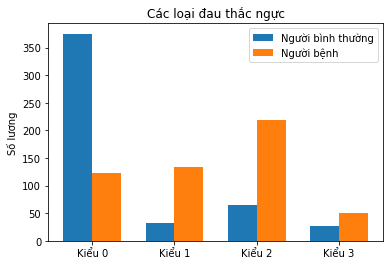

In [10]:
cp0 = df[df.cp == 0]
cp1 = df[df.cp == 1]
cp2 = df[df.cp == 2]
cp3 = df[df.cp == 3]
cp0_nor = np.sum(np.array(cp0['target']) == 0)
cp1_nor = np.sum(np.array(cp1['target']) == 0)
cp2_nor = np.sum(np.array(cp2['target']) == 0)
cp3_nor = np.sum(np.array(cp3['target']) == 0)
cp0_nnor = np.sum(np.array(cp0['target']) == 1)
cp1_nnor = np.sum(np.array(cp1['target']) == 1)
cp2_nnor = np.sum(np.array(cp2['target']) == 1)
cp3_nnor = np.sum(np.array(cp3['target']) == 1)
nor = (cp0_nor, cp1_nor, cp2_nor, cp3_nor)
not_nor = (cp0_nnor, cp1_nnor, cp2_nnor, cp3_nnor)

ind = np.arange(len(nor))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width / 2, nor, width,
                label = 'Người bình thường')
rects2 = ax.bar(ind + width / 2, not_nor, width,
                label = 'Người bệnh')

ax.set_ylabel('Số lương')
ax.set_title('Các loại đau thắc ngực')
ax.set_xticks(ind)
ax.set_xticklabels(('Kiểu 0', 'Kiểu 1', 'Kiểu 2', 'Kiểu 3'))
ax.legend()

plt.show()

Theo biểu đồ, phần lớn những người mắc bệnh tim thường có dấu hiệu đau ngực kiểu 2(Kiểu đau ngực không đặc hiệu) khoảng 43%, kế tiếp là kiểu 1(đau không điển hình) khoảng 25% và kiểu 0(đau điển hình) khoảng 23%, thấp nhất là kiểu 3(không có triệu chứng) khoảng 9%,

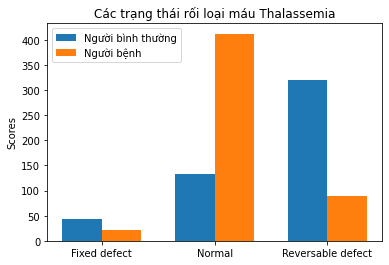

In [11]:
thal_1 = df[df.thal == 1]
thal_2 = df[df.thal == 2]
thal_3 = df[df.thal == 3]
thal_1_nor = np.sum(np.array(thal_1['target']) == 0)
thal_2_nor = np.sum(np.array(thal_2['target']) == 0)
thal_3_nor = np.sum(np.array(thal_3['target']) == 0)
thal_1_nnor = np.sum(np.array(thal_1['target']) == 1)
thal_2_nnor = np.sum(np.array(thal_2['target']) == 1)
thal_3_nnor = np.sum(np.array(thal_3['target']) == 1)
nor = (thal_1_nor, thal_2_nor, thal_3_nor)
not_nor = (thal_1_nnor, thal_2_nnor, thal_3_nnor)

ind = np.arange(len(nor)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width / 2, nor, width,
                label = 'Người bình thường')
rects2 = ax.bar(ind + width / 2, not_nor, width,
                label = 'Người bệnh')

ax.set_ylabel('Scores')
ax.set_title('Các trạng thái rối loại máu Thalassemia')
ax.set_xticks(ind)
ax.set_xticklabels(('Fixed defect', 'Normal', 'Reversable defect'))
ax.legend()

plt.show()

Biểu đồ cho thấy những người ở trạng thái Normal (không mắc bệnh rối loạn máu) vẫn có khả năng mắc bệnh tim, nó còn phụ thuộc vào những yếu tố khác vì người bệnh tim ở trạng thái này chiếm hơn 50% . Và những người mắc bệnh rối loạn máu có khả năng mắc bệnh tim ở mức độ trung bình từ 25-30%.